# Computer Graphik: Curves - Übung

I.BA_CG, SW 09

Léonard Wyrsch

## Aufgabe 1: Interpolierende Kurve durch vier Punkte
Bestimmen Sie eine interpolierende Kurve 3. Grades der Form

P(t) = c<sub>0</sub> + c<sub>1</sub>t +c<sub>2</sub>t<sup>2</sup> + c<sub>3</sub>t<sup>3</sup>

durch die Punkte P<sub>0</sub> = \[0,0\]<sup>T</sup>, P<sub>1</sub> = \[2,2\]<sup>T</sup>, P<sub>2</sub> = \[0,3\]<sup>T</sup> und P<sub>4</sub> = \[2,4\]<sup>T</sup> mit Hilfe der Methode der unbestimmten Koeffizienten.

    1 0 0  0   c0   0
    1 1 1  1 * c1 = 2
    1 2 4  8   c2   3
    1 3 9 27   c3   4

    1 0 0  0 0         1 0 0  0 0         1 0 0  0  0         1 0 0 0  0
    1 1 1  1 2  -1[1]  0 1 1  1 2         0 1 1  1  2         0 1 1 1  2  -1[3]
    1 2 4  8 3  -1[1]  0 2 4  8 3  -2[2]  0 0 2  6 -1  /2     0 0 1 3 -1/2
    1 3 9 27 4  -1[1]  0 3 9 27 4  -3[2]  0 0 6 24 -2  -3[3]  0 0 0 6  1  /6

    1 0 0  0  0      1 0 0  0  0           1 0 0 0   0
    0 1 0 -2  5/2    0 1 0 -2  5/2  +2[4]  0 1 0 0 17/6
    0 0 1  3 -1/2    0 0 1  3 -1/2  -3[4]  0 0 1 0  -1
    0 0 0  6  1  /6  0 0 0  1  1/6         0 0 0 1  1/6

    c0 =   0
    c1 = 17/6
    c2 =  -1
    c3 =  1/6

    P(t) = 17/6 * t - t^2 + 1/6 * t^3

## Aufgabe 2: Bézier-Kurve durch vier Punkte
Bestimmen Sie die (kubische) Bézier-Kurve durch die Punkte P<sub>0</sub>(0,0), P<sub>1</sub>(2,−4), P<sub>2</sub>(5,6) und P<sub>3</sub>(9,0) und skizzieren Sie diese.

Skizze

     y
     6           P2
     5 
     4 
     3 
     2           xxxxx
     1         x       x
     0 P0    x           P3
    -1   xxx
    -2
    -3
    -4     P1
       0 1 2 3 4 5 6 7 8 9 x

Kurve

    (1 - t)^3 * P0 + 3(1 - t)^2 * t * P1 + 3(1 - t) * t^2 * P2 + t^3 * P3

    (1 - t)^3 * 0 + 3(1 - t)^2 * t * 2 + 3(1 - t) * t^2 * 5 + t^3 * 9
                0                   -4                    6         0
    
    (1 - t)^2 *   6t + (1 - t) * 15t^2 + 9t^3
                -12t             18t^2   0

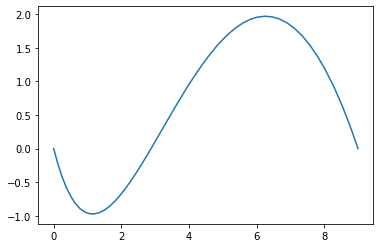

In [12]:
import numpy as np
from matplotlib import pyplot as plt

def f(t):
    x = (1 - t)**2 *   6 * t + (1 - t) * 15 * t**2 + 9 * t**3
    y = (1 - t)**2 * -12 * t + (1 - t) * 18 * t**2
    return x, y

points = [f(t) for t in np.linspace(0, 1)]
x = [p[0] for p in points]
y = [p[1] for p in points]

plt.plot(x, y)

## Aufgabe 3: Nochmals: Bézier-Kurve durch vier Punkte
Betrachten Sie die vier Punkte aus Aufgabe 2. Welche kubische Bézier-Kurve geht exakt durch diese vier Punkte? Hinweis: Bekanntlich geht eine Bézier-Kurve der Form

P(t) = C<sub>0</sub>(1 − t)<sup>3</sup> + 3C<sub>1</sub>t(1 − t)<sup>2</sup> + 3C<sub>2</sub>t<sup>2</sup>(1 − t) + C<sub>3</sub>t<sup>3</sup>

nicht durch alle Kontrollpunkte C<sub>0</sub>, C<sub>1</sub>, C<sub>2</sub> und C<sub>3</sub>: lediglich durch den ersten und den letzten, d.h. C<sub>0</sub> = P<sub>0</sub> und C<sub>3</sub> = P<sub>3</sub>. Wir wollen nun C<sub>1</sub> = (C<sub>1,x</sub>,C<sub>1,y</sub>)<sup>T</sup> und C<sub>2</sub> = (C<sub>2,x</sub>,C<sub>2,y</sub>)<sup>T</sup> so bestimmen, dass gilt:

P(t = 1/4) = P<sub>1</sub> = \[2, −4\]<sup>T</sup>  
P(t = 3/4) = P<sub>2</sub> = \[5, 6\]<sup>T</sup>

Die einzigen vier Variablen sind also die Komponenten von C<sub>1</sub> und C<sub>2</sub>. Wenn Sie den Ansatz

P(t) = P<sub>0</sub>(1 − t)<sup>3</sup> + 3C<sub>1</sub>t(1 − t)<sup>2</sup> + 3C<sub>2</sub>t<sup>2</sup>(1 − t) + P<sub>3</sub>t<sup>3</sup>

für t = 1/4 und t = 3/4 auswerten und verlangen, dass

P(t = 1/4) = P<sub>1</sub> und P(t = 3/4) = P<sub>2</sub>

gilt, erhalten Sie vier Gleichungen in den gesuchten Unbekannten C<sub>1,x</sub>, C<sub>1,y</sub>, C<sub>2,x</sub> und C<sub>2,y</sub>. Beachte: es gibt viele Bézier-Kurven durch P<sub>1</sub> und P<sub>2</sub> welche in P<sub>0</sub> starten und in P<sub>3</sub> enden. Alleine der Fahrplan (wo man zu welcher Zeit t ist) macht die Darstellung eindeutig!

    P(t) = 3(1 - t)^2 * t * P1 + 3(1 - t) * t^2 * P2 + t^3 * 9
                                                             0

    P1 = P(1/4) =  2    P2 = P(3/4) = 5
                  -4                  6

    P(1/4) = 3(3/4)^2 * 1/4 * C1 + 3(3/4) * (1/4)^2 * C2 + (1/4)^3 * 9
                                                                     0

    = 3 * 9/16 * 1/4 * C1 + 9/4 * 1/16 * C2 + 1/64 * 9
                                                     0

    = 27/64 * C1x + 9/64 * C2x + 1/64 * 9 =  2
              C1y          C2y          0   -4

    P1 = 27/64 * C1x + 9/64 * C2x = 119/64
                 C1y          C2y     -4

    P(3/4) = 3(1/4)^2 * 3/4 * C1 + 3(1/4) * (3/4)^2 * C2 + (3/4)^3 * 9
                                                                     0

    = 3/16 * 3/4 * C1 + 3/4 * 9/16 * C2 + 27/64 * 9
                                                  0

    = 9/64 * C1x + 27/64 * C2x + 27/64 * 9 = 5
             C1y           C2y           0   6

    P2 = 9/64 * C1x + 27/64 * C2x = 77/64
                C1y           C2y     6

    64 * P1 = 27 * C1x + 9 * C2x = 119
                   C1y       C2y  -256

    64 * P2 = 9 * C1x + 27 * C2x =  77
                  C1y        C2y   384

    27  0  9  0  119  /9  3 0 1 0  119/9  -3[3]  0 0 -8  0  -112/9  /-8
     0 27  0  9 -256  /9  0 3 0 1 -256/9  -3[4]  0 0  0 -8 -1408/9  /-8
     9  0 27  0   77  /9  1 0 3 0   77/9         1 0  3  0    77/9
     0  9  0 27  384  /9  0 1 0 3  384/9         0 1  0  3   384/9

    0 0 1 0  14/9         0 0 1 0   14/9
    0 0 0 1 176/9         0 0 0 1  176/9
    1 0 3 0  77/9  -3[1]  1 0 0 0   35/9
    0 1 0 3 384/9  -3[2]  0 1 0 0 -144/9

    C1 =   35/9
         -144/9

    C2 =   14/9
          176/9

In [15]:
def f2(t):
    x = 3 * (1 - t)**2 *   35/9 * t + 3 * (1 - t) *  14/9 * t**2 + 9 * t**3
    y = 3 * (1 - t)**2 * -144/9 * t + 3 * (1 - t) * 176/9 * t**2
    return x, y

assert f2(1/4) == (2, -4)
assert f2(3/4) == (5,  6)

print(f2(1/4))
print(f2(3/4))

(2.0, -4.0)
(5.0, 6.0)


## Aufgabe 4<sup>*</sup>: Die B-Spline-Funktionen N<sub>j,m</sub>(t)
Zeigen Sie mit Hilfe eines Beweises durch Induktion nach m, dass gilt:

       i
       ∑    (N[j,m](t)) = 1
    j=i−m+1

Beachte: diese Aufgabe ist mit einem Stern bezeichnet und daher nicht einfach!

    m = 1

     i
     ∑  (N[j,1](t)) = N[i,1](t)
    j=i

    N[i,1](t) = 1 if t in range(t[i], t[i+1]) else 0

    N[i,1](t) = 1   q.e.d

---

    m > 1

## Aufgabe 5: B-Spline Basisfunktionen
Berechnen Sie N<sub>0,1</sub>(t), N<sub>1,1</sub>(t), N<sub>2,1</sub>(t), N<sub>0,2</sub>(t), N<sub>1,2</sub>(t) und N<sub>0,3</sub>(t)für den Knotenvektor t = (t<sub>0</sub>,t<sub>1</sub>,t<sub>2</sub>,t<sub>3</sub>) = (0,2,3,6).

    N[0,1] = 1 if t in range(0, 2) else 0
    N[1,1] = 1 if t in range(2, 3) else 0
    N[2,1] = 1 if t in range(3, 6) else 0

    N[0,2] = (t-t0)/(t1-t0) * N[0,1] + (t2-t)/(t2-t1) * N[1,1] =
    if t in range(0, 2): (t-t0)/(t1-t0) = (t-0)/(2-0) = t/2
    if t in range(2, 3): (t2-t)/(t2-t1) = (3-t)/(3-1) = 3 - t
    else: 0

    N[1,2] = (t-t1)/(t2-t1) * N[1,1] + (t3-t)/(t3-t2) * N[2,1] =
    if t in range(2, 3): (t-t1)/(t2-t1) = (t-2)/(3-2) = t - 2
    if t in range(3, 6): (t3-t)/(t3-t2) = (6-t)/(6-3) = 2 - t/3
    else: 0

    N[0,3] = (t-t0)/(t2-t0) * N[0,2] + (t3-t)/(t3-t1) * N[1,2] =
    if t in range(0, 2): (t-t0)/(t2-t0) * t/2 = (t-0)/(3-0) * t/2 = t^2/6

    if t in range(2, 3): (t-t0)/(t2-t0) * (3-t) + (t3-t)/(t3-t1) * (t-2) = t/3 * (3-t) + (6-t)/4 * (t-2) = (3t-t^2)/3 + (6t-t^2-12+2t)/4 = t - t^2/3 + 2t - t^2/4 - 3 = -7/12 * t^2 + 3t - 3

    if t in range(3, 6): (t3-t)/(t3-t1) * (2-t/3) = (6-t)/(6-2) * (2-t/3) = (6-t)/4 * (2-t/3) = 2*(6-t)/4 - t*(6-t)/12 = (6-t)^2/12

                t^2/6                 wenn 0 <= t < 2
    N[0,3](t) = -7/12 * t^2 + 3t - 3  wenn 2 <= t < 3
                (6 - t)^2 / 12        wenn 3 <= t < 6

## Aufgabe 6: Quadratische B-Spline Basisfunktionen N<sub>j,3</sub>(t)
Verwendet Sie die Rekursionsformel um N<sub>j,3</sub>(t) vollständig auszudrücken in t, t<sub>j</sub>, t<sub>j+2</sub> und t<sub>j+3</sub>. Beachten Sie, dass N<sub>j,3</sub>(t) nur verschieden von Null ist für t<sub>i</sub> < t < t<sub>i+3</sub>. Plotten Sie N<sub>j,3</sub>(t) im Intervall \[t<sub>j</sub>,t<sub>j+3</sub>\].

## Aufgabe 7: Literaturstudium
Lesen Sie den Abschnitt 7.14 aus dem Buch von David Salomon, “*Curves and Surfaces for Computer Graphics* und betrachten Sie insbesondere das Beispiel auf der Seite 303 unten. Zeichnen Sie die Basisfunktionen N<sub>03</sub>(t), N<sub>13</sub>(t), N<sub>23</sub>(t), N<sub>33</sub>(t) und N<sub>43</sub>(t) auf (z.B. Maple verwenden). Beantworten Sie dann folgende Fragen mit entsprechenden Begründungen:

1. Wie sieht die NURBS-Kurve für w<sub>2</sub> = 0 aus?
2. Was bewirkt die Veränderung des Gewichtes w<sub>2</sub>?